In [2]:
pip install nltk

  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
     -------------------------------------- 268.3/268.3 KB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 97.9/97.9 KB 5.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
import re
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt



In [4]:
# Загрузка стоп-слов и инициализация лемматизатора
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...


In [5]:
# Удалим пунктуацию, приведем к нижнему регистру, лемматизируем и удалим стоп-слова
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text).lower()
    words = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return ' '.join(words)

def visualize_top_words(filename, title):
    print(f"Processing the song: {title}\n")

    with open(filename, 'r') as f:
        song = f.read()
    print("Original text:\n", song[:200], "...")  # начало текста

    processed_song = preprocess_text(song)
    print("\nProcessed text:\n", processed_song[:200], "...")  # начало обработанного текста

    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform([processed_song])

    feature_names = tfidf_vectorizer.get_feature_names_out()
    tfidf_values = tfidf_matrix.toarray()[0]
    tfidf_dict = dict(zip(feature_names, tfidf_values))

    sorted_tfidf = sorted(tfidf_dict.items(), key=lambda item: item[1], reverse=True)
    print("\nTop 5 words by TF-IDF:")
    for word, value in sorted_tfidf[:5]:
        print(word, ":", value)

    plt.figure(figsize=(15, 10))
    top_n = 20
    words = [item[0] for item in sorted_tfidf[:top_n]]
    values = [item[1] for item in sorted_tfidf[:top_n]]

    plt.barh(words, values, color='skyblue')
    plt.xlabel('TF-IDF Value')
    plt.title(f'Top Words by TF-IDF for "{title}"')
    plt.gca().invert_yaxis()
    plt.show()

Processing the song: Gods plan

Original text:
 Yeah, they wishin' and wishin' and wishin' and wishin'
They wishin' on me, yuh

I been movin' calm, don't start no trouble with me
Tryna keep it peaceful is a struggle for me
Don't pull up at 6 AM
to  ...

Processed text:
 yeah wishin wishin wishin wishin wishin yuh movin calm dont start trouble tryna keep peaceful struggle dont pull 6 cuddle know like lovin dont wanna die miss yes see thing wishin hope got brother outl ...

Top 5 words by TF-IDF:
wishin : 0.74376843799781
ayy : 0.2574583054607804
thing : 0.2574583054607804
bad : 0.22885182707624924
god : 0.1716388703071869


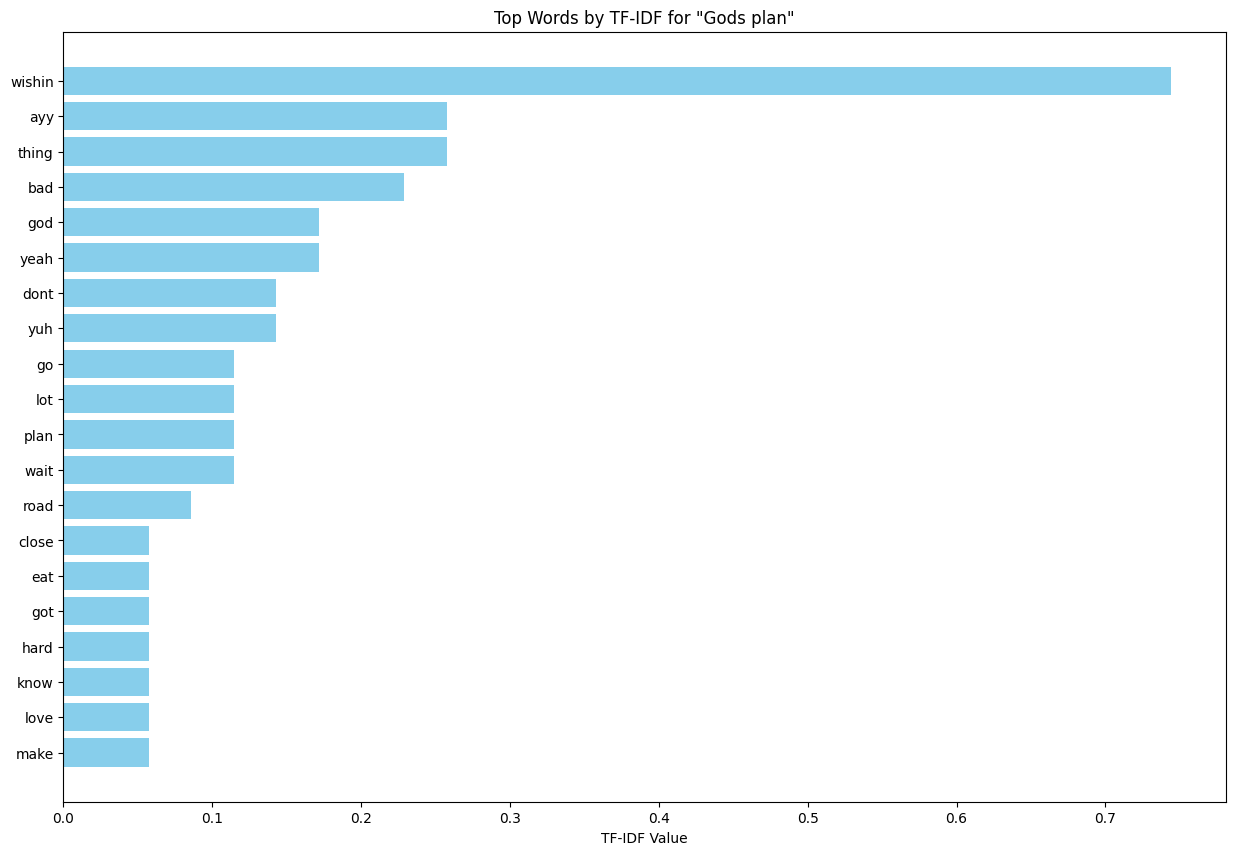

In [12]:
visualize_top_words('Drake_Gods_plan.txt', 'Gods plan')

Processing the song: Grateful

Original text:
 
Always do it on my own
So I gotta get through it
And the only thing I know
Is to love what I'm doing
Never give up, never slow
Till I finally prove it
Never listen to the no's
I just wanna keep movin ...

Processed text:
 always gotta get thing know love im never give never slow till finally prove never listen no wanna keep moving keep head act head thats fact never looking back ima keep track keep head staying strong  ...

Top 5 words by TF-IDF:
yeah : 0.6277524511897817
im : 0.4519817648566429
never : 0.27621107852350396
oh : 0.20088078438073015
keep : 0.15066058828554763


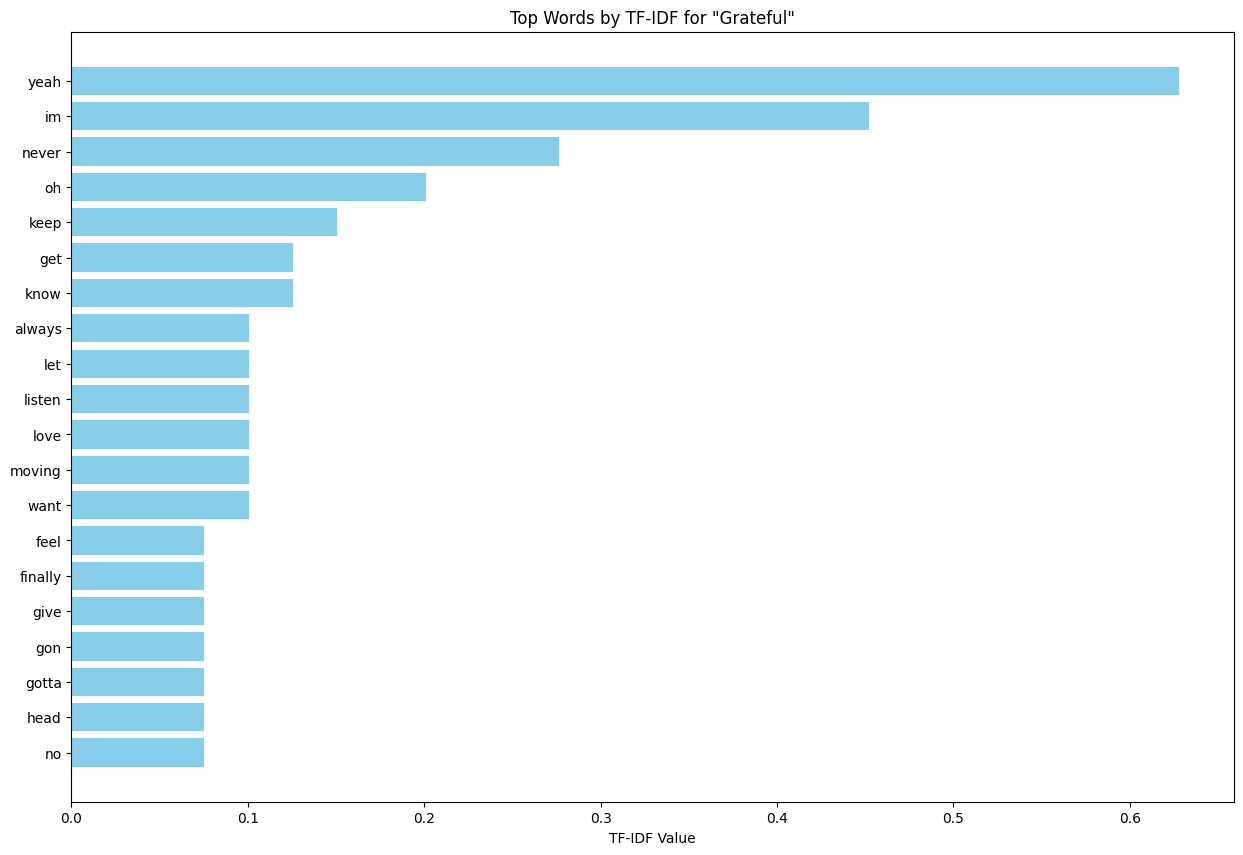

In [13]:
visualize_top_words('NEFFEX_Grateful.txt', 'Grateful')

Processing the song: Blinding Lights

Original text:
 Yeah


I've been tryna call
I've been on my own for long enough
Maybe you can show meвЂ…howвЂ…to love, maybe
I'mвЂ…goin' through withdrawals
You don't even haveвЂ…to do too much
You can turn me on wit ...

Processed text:
 yeah ive tryna call ive long enough maybe show meвђhowвђto love maybe imвђgoin withdrawal dont even haveвђto much turn touch baby look around sin city cold empty oh one around judge oh cant see clearl ...

Top 5 words by TF-IDF:
im : 0.4045566970313675
hey : 0.36410102732823074
oh : 0.2831896879219572
ooh : 0.2831896879219572
cant : 0.24273401821882049


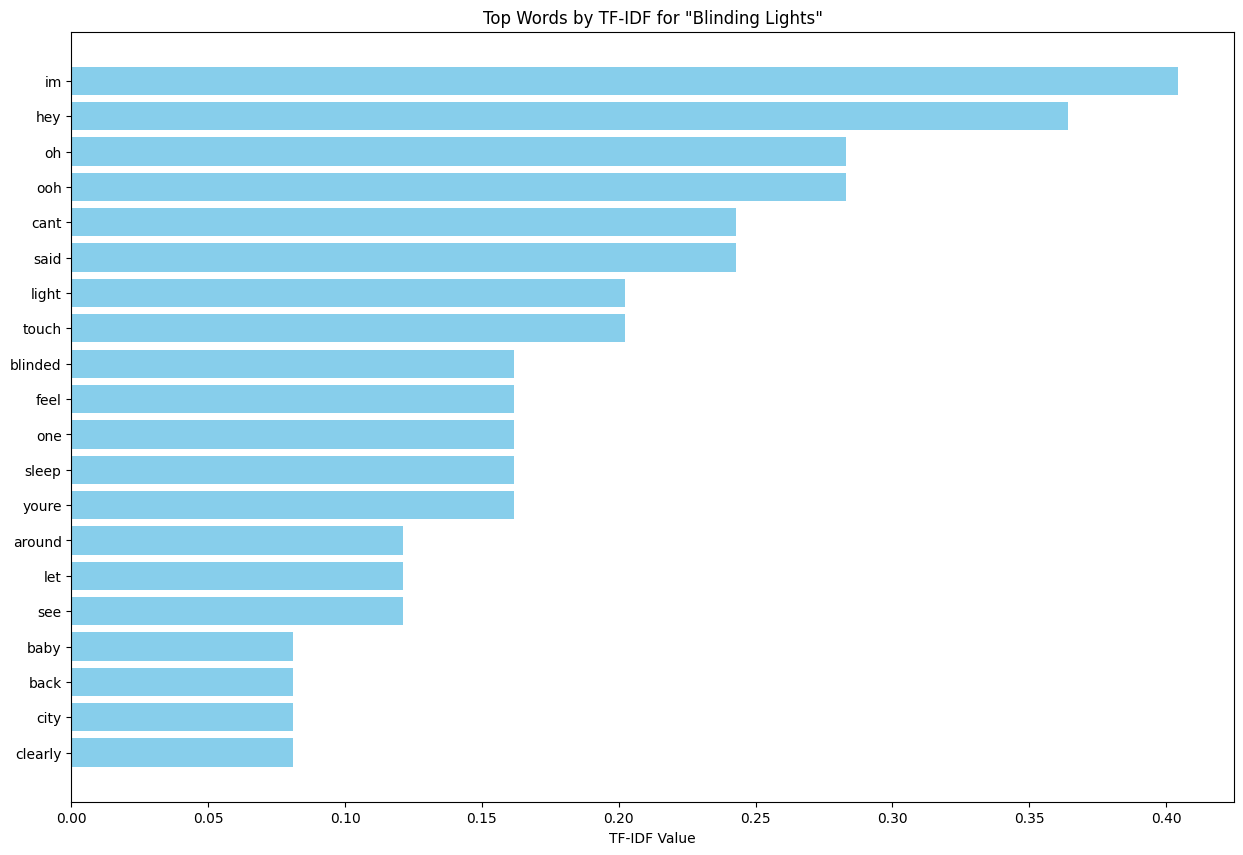

In [16]:
visualize_top_words('The_Weeknd_Blinding Lights.txt', 'Blinding Lights')